# AMES housing dataset

## Problem Statement

Given the AMES housing dataset, we are tasked to build a regression model that will predict the price of a house at sale

## Importing and perform Exploratory Data Analysis

### Import necessary libraries and data into environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
raw_data = pd.read_csv('data/train.csv')

In [3]:
raw_data.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
# Funtion to lowercase and replace spaces in column names with underscore
def fix_columns(df):
    df.columns = [ col.strip().replace(" ","_").lower() for col in df.columns]

In [5]:
fix_columns(raw_data)

In [6]:
# Features that are not in numerical datatype
[ (col, dtype) for col, dtype in raw_data.dtypes.items() if ( (dtype != np.dtype('int64')) & (dtype != np.dtype('float64'))  ) ]

[('ms_zoning', dtype('O')),
 ('street', dtype('O')),
 ('alley', dtype('O')),
 ('lot_shape', dtype('O')),
 ('land_contour', dtype('O')),
 ('utilities', dtype('O')),
 ('lot_config', dtype('O')),
 ('land_slope', dtype('O')),
 ('neighborhood', dtype('O')),
 ('condition_1', dtype('O')),
 ('condition_2', dtype('O')),
 ('bldg_type', dtype('O')),
 ('house_style', dtype('O')),
 ('roof_style', dtype('O')),
 ('roof_matl', dtype('O')),
 ('exterior_1st', dtype('O')),
 ('exterior_2nd', dtype('O')),
 ('mas_vnr_type', dtype('O')),
 ('exter_qual', dtype('O')),
 ('exter_cond', dtype('O')),
 ('foundation', dtype('O')),
 ('bsmt_qual', dtype('O')),
 ('bsmt_cond', dtype('O')),
 ('bsmt_exposure', dtype('O')),
 ('bsmtfin_type_1', dtype('O')),
 ('bsmtfin_type_2', dtype('O')),
 ('heating', dtype('O')),
 ('heating_qc', dtype('O')),
 ('central_air', dtype('O')),
 ('electrical', dtype('O')),
 ('kitchen_qual', dtype('O')),
 ('functional', dtype('O')),
 ('fireplace_qu', dtype('O')),
 ('garage_type', dtype('O')),
 ('

There are features that are not in numerical format. We will explore this columns and convert them to numerical during feature engineering below.

### Data Cleaning : Dropping columns with high percentage of missing values

In [7]:
# Obtain some statistics about missing data by columns
na_cols_stats = [ [x[0],x[1]] for x in raw_data.isnull().sum().items() if x[1] > 0]  
na_cols_stats = sorted(na_cols_stats, key= lambda x: x[1],reverse=True)
na_cols_pd = pd.DataFrame(data=na_cols_stats, columns=['Feature','Missing Rows'])
na_cols_pd['Percentage'] = (na_cols_pd['Missing Rows'] / raw_data.shape[0] * 100).map(lambda x : "{:0.4g}%".format(x))

na_cols_pd.head(10)

,Feature,Missing Rows,Percentage
0,pool_qc,2042,99.56%
1,misc_feature,1986,96.83%
2,alley,1911,93.17%
3,fence,1651,80.5%
4,fireplace_qu,1000,48.76%
5,lot_frontage,330,16.09%
6,garage_yr_blt,114,5.558%
7,garage_finish,114,5.558%
8,garage_qual,114,5.558%
9,garage_cond,114,5.558%


Due to the high percentage of missing data within each of this columns, these few features will not be included into the machine learning model and will be dropped.

- Pool QC 99.56 % missing 
- Misc Feature 96.83 % missing
- Alley 93.17% missing
- Fence 80.49% missing
- fireplace_qu 48.75% missing

- id
- pid

id and pid columns are dropped as they are not relevant features in predicting sale prices.



In [8]:
drop_cols = {'pool_qc','misc_feature','alley','fence','id','pid'}

In [9]:
def drop_init_cols(df):
    return df[[col for col in df.columns if col not in drop_cols]]

In [10]:
df = drop_init_cols(raw_data)

### Checking for outliers in data

As recommended by the [data source provider](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt), some of the major outliers should be removed. Specificially, observations with gr liv area larger than 4000 should be removed.

In [11]:
# Drop observations with Greater Living area which are larger than 4000
df = df[ df['gr_liv_area'] < 4000 ]

### Exploring Missing data by rows

Text(0.5, 1.0, 'Frequency of missing columns per row')

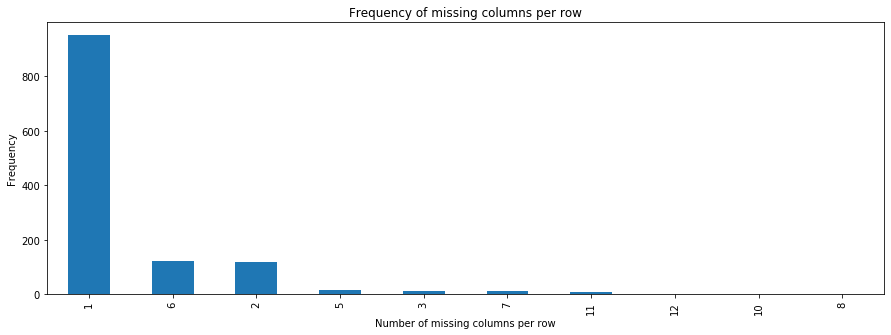

In [12]:
# Missing values along axis=1
# Statistics for missing values by rows
na_rows_stats = df.isnull().sum(axis=1)
missing_cols_in_row = na_rows_stats.value_counts()
missing_cols_in_row.drop(0, inplace=True)
missing_cols_in_row.plot.bar(figsize=(15,5));
plt.xlabel("Number of missing columns per row");
plt.ylabel("Frequency");
plt.title("Frequency of missing columns per row")

In [13]:
print("\n".join([ "{} rows with {} missing values".format(count,miss) for miss, count in missing_cols_in_row.items() ]) )

950 rows with 1 missing values
123 rows with 6 missing values
116 rows with 2 missing values
14 rows with 5 missing values
13 rows with 3 missing values
12 rows with 7 missing values
7 rows with 11 missing values
2 rows with 12 missing values
1 rows with 10 missing values
1 rows with 8 missing values


In [14]:
# Total rows containing missing values
missing_cols_in_row.sum()

1239

In [15]:
# Percentage of rows with missing values
missing_cols_in_row.sum()/df.shape[0]

0.6046852122986823

#### Note on missing data by row:
As illustrated above, there are 1239 rows with at least 1 missing value on it, that accounts for 60% of the total dataset. Hence, we can not simply drop all the rows with null values as we will lose a significant amount of data.

## Imputation & Feature engineering


These columns have missing values. After analyzing the datatype of each column, we will impute these missing values according to the definition below.

- Catagorical columns will be imputed with 'na' string which means it is not available, prior to one hot encoding which will turn 'na' into a class by itself.
- Ordinal values will be imputed with 0 which means the feature is at the lowest possible value or the feature does not exist


### Data Dictionary

| feature        | null count | type              | impute with        |
|----------------|------------|-------------------|--------------------|
| garage_cond    | 114        | nominal           | na                 |
| garage_qual    | 114        | nominal           | na                 |
| mas_vnr_type   | 22         | nominal           | na                 |
| lot_frontage   | 330        | ordinal           | nan=0              |
| fireplace_qu	 | 1000       | Change to ordinal | nan =0             |
| garage_finish  | 114        | Change to ordinal | nan=0              |
| garage_yr_blt  | 114        | ordinal           | int(median of col) |
| garage_type    | 113        | ordinal           | int(median of col) |
| bsmt_exposure  | 58         | Change to ordinal | nan=0              |
| bsmtfin_type_2 | 56         | change to ordinal | nan=0              |
| bsmt_qual      | 55         | change to ordinal | nan = 0            |
| bsmt_cond      | 55         | change to ordinal | nan = 0            |
| bsmtfin_type_1 | 55         | change to ordinal | nan =0             |
| mas_vnr_area   | 22         | ordinal           | nan = 0            |
| bsmt_full_bath | 2          | ordinal           | nan = 0            |
| bsmt_half_bath | 2          | ordinal           | nan=0              |
| bsmt_unf_sf    | 1          | ordinal           | nan=0              |
| bsmtfin_sf_2   | 1          | ordinal           | nan=0              |
| garage_cars    | 1          | ordinal           | nan=0              |
| garage_area    | 1          | ordinal           | nan=0              |
| bsmtfin_sf_1   | 1          | ordinal           | nan=0              |

This is a subset of the full dictionary. For the full details of each column, please refer to the source provider [here](#http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In [16]:
# Separating ordinal/quantitative columns from categorical/qualitative columns and 
# categorical columns that needed to be one hot encoded

one_hot_cols = ['ms_subclass','ms_zoning','street','land_contour'
                ,'lot_config','neighborhood','condition_1','condition_2',
               'bldg_type','house_style','roof_style','roof_matl','exterior_1st'
               ,'exterior_2nd','mas_vnr_type','foundation','heating','central_air',
               'garage_type','sale_type']

# ordinal_cols = [col for col in df.columns if col not in one_hot_cols and col != 'saleprice' ]
all_features = [col for col in df.columns if col not in one_hot_cols and col != 'saleprice' ]

# These columns needed to be converted into ordinal values as the categories have an ordinal significance to it
categorical_to_ordinal_cols =  [ col for col,typ in df[all_features].dtypes.items() if typ == object]

# These columns are already imported as continuous variable, conversion is not needed (but need to impute null values)
continuous_cols = [ col for col in all_features if col not in categorical_to_ordinal_cols ]


### Notes for Feature engineering:
Each of the subset of the final model will need to go through transformation prior to feeding into our machine learning model.
- Nominal features that will be One-hot encoded:
        1. Null columns will be set to 'na'
        2. Any other "None" strings will be converted to 'na' as a standard to refer to the absence of the feature.
        3. These columns will be one-hot encoded with dummy variables
- Nominal features that have ranking in each of the categories.
        1. Run a custom parser that will convert the categorical values into the corresponding ordinal values. Note that the ordinal values differ between columns.
        2. Null values will take a value of 0
- Continuous features with null values will be:
        1. fitted with the median value of the particular feature.
        2. Null values in the test set will be fitted with the median values from the training set after train test split
***
3 sub dataframes will be created, namely:
    1. df_s1 - dataframe for features that will be one-hot encoded
    2. df_s2 - dataframe for ordinal features obtained by conversion
    3. df_s3 - dataframe for continuous features
       

In [17]:
# Standardizing any "None" string to 'na' for the nominal columns
def get_na_str(x):
    if type(x) != str:
        return x
    else:
        return 'na' if x.lower() == 'none' else x


def get_s1(df):
    '''
    Function that converts one-hot columns in
    '''
    df_s1 = df[one_hot_cols].fillna('na')
    df_s1['ms_subclass'] = df_s1['ms_subclass'].astype(object)
    df_s1 = df_s1.applymap(lambda x: get_na_str(x))
    return df_s1

In [18]:
# Method to get nominal value from dictionary, 
# If the column name does not exist in the dictionary, return the original value
# If the existing value does not map to a number, return 0
# If the key is not a string, return 0
def to_ord(colname,x):
    mappers = {
        0 : {np.nan:0,'na':0,'ir3':1,'ir2':2,'ir1':3,'reg':4}, # lot_shape
        1 : {np.nan:0,'elo':1,'nosewa':2,'nosewr':3,'allpub':4}, # utilities
        2 : {'gtl':1,'mod':2,'sev':3}, # Land slope
        3 : {'na':0,'po':1,'fa':2,'ta':3,'gd':4,'ex':5}, # exter_qual
        4 : {'na':0,'no':1,'mn':2,'av':3,'gd':4}, # basement exposure map
        5 : {'na':0,'unf':1, 'lwq':2 , 'rec':3, 'blq':4, 'alq':5, 'glq':6}, #basement fin type 1
        6 : { 'na': 0, 'mix': 1,'fusep':2, 'fusef':3,'fusea':4,'sbrkr':5}, #eletrical
        7 : { 'na':0,'sal':1,'sev':2,'maj2':3,'maj1':4,'mod':5,'min2':6,'min1':7,'typ':8},
        8 : { 'na':0, 'unf':1,'rfn':2,'fin':3 },
        9 : { 'na':0, 'n':1,'p':2,'y':3}
    }
    col_map_dic = {
        'lot_shape': 0,
        'utilities' : 1,
        'land_slope' : 2,
        'exter_qual' : 3,
        'exter_cond' : 3,
        'bsmt_qual': 3,
        'bsmt_cond' : 3,
        'bsmt_exposure': 4,
        'bsmtfin_type_1' : 5,
        'bsmtfin_type_2': 5,
        'heating_qc': 3,
        'electrical': 6,
        'kitchen_qual': 3,
        'functional':7,
        'garage_finish' :8,
        'garage_qual' : 3,
        'garage_cond' : 3,
        'paved_drive': 9,
        'fireplace_qu': 3
        
    }
    mapper_dic = mappers.get(col_map_dic.get(colname))
    if not mapper_dic:
        print("Warning: Unable to map:{},{}".format(colname,x))
        return x
    return 0 if type(x)!= str else mapper_dic.get(x.lower(),0)

In [19]:
# Ordinal values will be mapped to 0-5 
# 0 represent non-existent feature, 5 represents the best for the particular category

# Example, the 'allpub' value in the utilities category will be mapped to 4
print(to_ord('utilities','allpub'))

# Example, the 'ex' value in the exter_qual category will be mapped to 5
print(to_ord('exter_qual','ex'))

4
5


In [20]:
# Function to generate s2 sub dataframe (Categorical columns converted to ordinal)
def get_s2(main_df):
    s2 = pd.DataFrame()
    for col in categorical_to_ordinal_cols:
        s2[col]= main_df[col].map(lambda x: to_ord(col,x) )
    return s2

# Function to return a dataframe with continuous features
def get_s3(df):
    return df[continuous_cols]

In [21]:
# Helper method to generate a combination dataframe using pd.contact
def get_comb_df(dfs):
    '''
    Accepts an array of dataframes, s1, s2 and s3 and combines them into one dataframe.
    '''
    # convert s1 to dummies
    s1 = pd.get_dummies(dfs[0].astype(str),drop_first=True)
    
    comb = pd.concat( [s1]+dfs[1:], axis=1)
    invalid_dtypes = [ col for col in comb.dtypes.unique() if str(col) not in ['uint8','float64','int64'] ]
    if invalid_dtypes:
        print("Warning Invalid datatype detected:{}".format(invalid_dtypes))
    if comb.isna().any().any():
        print("Warning null values detected in combined dataframe")
    return comb

In [22]:
# Get combined dataframe with dummy values

# Creating sub dataframe for nominal columns 
df_s1 = get_s1(df)
# Generate df_s2
df_s2 = get_s2(df)

# Generate df_s3 (Continuous features)
# Fill na values with the median value of each category
df_s3 = get_s3(df)
df_comb = get_comb_df([df_s1,df_s2,df_s3])

Warning null values detected in combined dataframe


In [23]:
ordinals_corr_df = df_comb[all_features].corr()
ordinals_corr_df.abs().unstack()
high_corr_vars = ordinals_corr_df.abs().unstack().sort_values(kind='quicksort',ascending=False)
high_corr_colls = high_corr_vars[(high_corr_vars < 1) & (high_corr_vars > 0.5)][:20]
high_corr_colls

garage_qual     garage_cond       0.950489
garage_cond     garage_qual       0.950489
garage_cars     garage_area       0.897057
garage_area     garage_cars       0.897057
fireplaces      fireplace_qu      0.860785
fireplace_qu    fireplaces        0.860785
year_built      garage_yr_blt     0.825070
garage_yr_blt   year_built        0.825070
totrms_abvgrd   gr_liv_area       0.812129
gr_liv_area     totrms_abvgrd     0.812129
1st_flr_sf      total_bsmt_sf     0.790674
total_bsmt_sf   1st_flr_sf        0.790674
bsmtfin_type_2  bsmtfin_sf_2      0.777928
bsmtfin_sf_2    bsmtfin_type_2    0.777928
exter_qual      overall_qual      0.738370
overall_qual    exter_qual        0.738370
kitchen_qual    exter_qual        0.729048
exter_qual      kitchen_qual      0.729048
bsmtfin_type_1  bsmtfin_sf_1      0.722855
bsmtfin_sf_1    bsmtfin_type_1    0.722855
dtype: float64

In [24]:
# Based on the correlation plot above, we identified and will remove one from each pair of  
# features that are highly correleated to avoid multicolinearity  
high_corr_colls_tobe_removed = {'garage_cond','garage_cars','totrms_abvgrd','total_bsmt_sf','bsmtfin_type_2','garage_yr_blt'
                               , 'overall_qual','kitchen_qual','bsmtfin_type_1','bedroom_abvgr','bsmt_qual',
                                'bsmtfin_sf_1','2nd_flr_sf','year_remod/add','garage_finish','year_built'}


In [25]:
def get_high_corr_cols(colls_tup):
#     all_colls = set()
    colls_to_drop=set()
    mirror_colls=set()
    for col1,col2 in colls_tup:
        if (col2 not in colls_to_drop) and (col1 not in mirror_colls) :
            colls_to_drop.add(col2)
            mirror_colls.add(col1)
    # Start extracting highly correlated columns from this list
    print(colls_to_drop)
get_high_corr_cols(high_corr_colls.index)

{'bsmtfin_type_2', 'garage_cars', 'fireplace_qu', '1st_flr_sf', 'exter_qual', 'bsmtfin_sf_1', 'garage_cond', 'fireplaces', 'gr_liv_area', 'overall_qual', 'garage_qual', 'totrms_abvgrd', 'bsmtfin_type_1', 'garage_yr_blt', 'year_built', 'garage_area', 'total_bsmt_sf', 'bsmtfin_sf_2'}


### Generate the final dataframe for the model

In [26]:
def get_final_df(df, cols_to_drop=set()):
    '''
    Whole pipeline to Generate final df by creating s1, s2 , s3 and combine all the data together
    Finally, remove columns that are in the high_corr_colls_tobe_removed set 
    Warning, high_corr_colls_tobe_removed will increase throughout this notebook as more columns 
    are added to this set
    '''
    #Generate s1 (fill )
    s1 = get_s1(df)

    # Engineer ordinal columns in test_s2
    s2 = get_s2(df)

    # Engineer ordinal columns that are not converted
    # Fill na values for ordinal coolumns that are not converted from categories
    s3 = get_s3(df)

    #Combine columns and get dummies
    comb = get_comb_df([s1,s2,s3])
    high_corr_colls_tobe_removed.update(cols_to_drop)
    
    return comb[[col for col in comb.columns if col not in high_corr_colls_tobe_removed]]

In [27]:
# The final dataset is created by dropping features that are highly correlated to each other
final = get_final_df(df)
final.shape

Warning null values detected in combined dataframe


(2049, 184)

There are still null values in the dataframe that will be addressed after splitting to training and test sets below, as we want to impute the null values in the test set with the median values from the training set.

### Split Training and testing sets

In [28]:
# Import necessary libraries
# Train test split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(final, df['saleprice'], test_size=0.10, random_state=42)
print("X_train Shape:{}\ny_train shape:{}\n\nX_test shape:{}\ny_test shape:{}".format(X_train.shape,y_train.shape,X_test.shape
                                                                                     ,y_test.shape))

X_train Shape:(1844, 184)
y_train shape:(1844,)

X_test shape:(205, 184)
y_test shape:(205,)


## Impute missing values of continuous features with median from training set.

In [29]:
X_train.columns[X_train.isna().any()].tolist()

['lot_frontage',
 'mas_vnr_area',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'garage_area']

In [30]:
X_test.columns[X_train.isna().any()].tolist()

['lot_frontage',
 'mas_vnr_area',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'garage_area']

In [31]:
X_train = X_train.fillna(X_train.median())

# Impute null values in the test set using median from training set.
X_test = X_test.fillna(X_train.median())
print(f'Any empty values in X_train? : {X_train.isna().any().any()}')
print(f'Any empty values in X_test? : {X_test.isna().any().any()}')

Any empty values in X_train? : False
Any empty values in X_test? : False


We choose to impute the missing values in the test set with the median values from the training set as the median values are less susceptible to outliers compared to using the mean value.

## EDA : Visualize relationship between variables

In [32]:

def subplots(df,columns,ppr=1,figsize=(15,6),plot_func=sns.boxplot, sharex=True, sharey=True,plotargs=None, title='',
             h_box=False):
    # Get number of rows
    num_rows = int(np.ceil(len(columns)/ppr))
    if 'saleprice' in columns:
        num_rows-= 1
    
    # Scale height to number of rows
    if figsize:
        figsize=(figsize[0],num_rows*figsize[1])


    if plot_func == sns.pairplot:
        if plotargs:
            sns.pairplot(df[columns],**plotargs)
        else:
            sns.pairplot(df[columns])
    if (plot_func == sns.boxplot) or (plot_func == sns.violinplot):

        fig, ax = plt.subplots(num_rows, ppr,figsize=figsize, sharex=sharex,sharey=sharey)
        if num_rows > 1:
            ax = ax.ravel()
            
            
        for i,col in enumerate(columns):
                if col == 'saleprice':
                    break
                if num_rows > 1:
                    axes=ax[i]
                else:
                    axes = ax
                
                cols = ['saleprice']
                cols.append(col)
                pd_melted = pd.melt(df[cols], id_vars=['saleprice'], var_name='key')
                pd_melted['kv'] = pd_melted['key'].map(str) + '_' + pd_melted['value'].map(str)
                if not h_box:
                    pt = plot_func(x='kv', y='saleprice', data=pd_melted, ax=axes);
                    pt.set_ylabel('Sale Price')
                    pt.set_xlabel(col)
                else:
                    pt = plot_func(x='saleprice', y='kv',  data=pd_melted, ax=axes);
                    pt.set_ylabel(col)
                    pt.set_xlabel('Sale Price')
                pt.set_title(title + ' ' + col + ' vs Sale Price'  )


### Investigating the relationsip between MS Zoning Feature and Sale Price


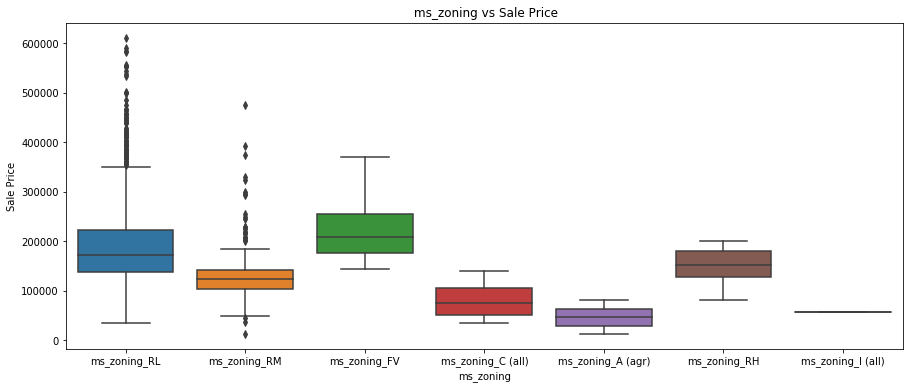

In [33]:
subplots(df, columns=['ms_zoning'])

From the boxplot, it appears that zones such as FV (Floating Village) and RL (Residential Low Density) have a higher median price than the rest. Thus we will not drop the zoning category from the features.

### Investigating Neighborhood category w.r.t Sale Price

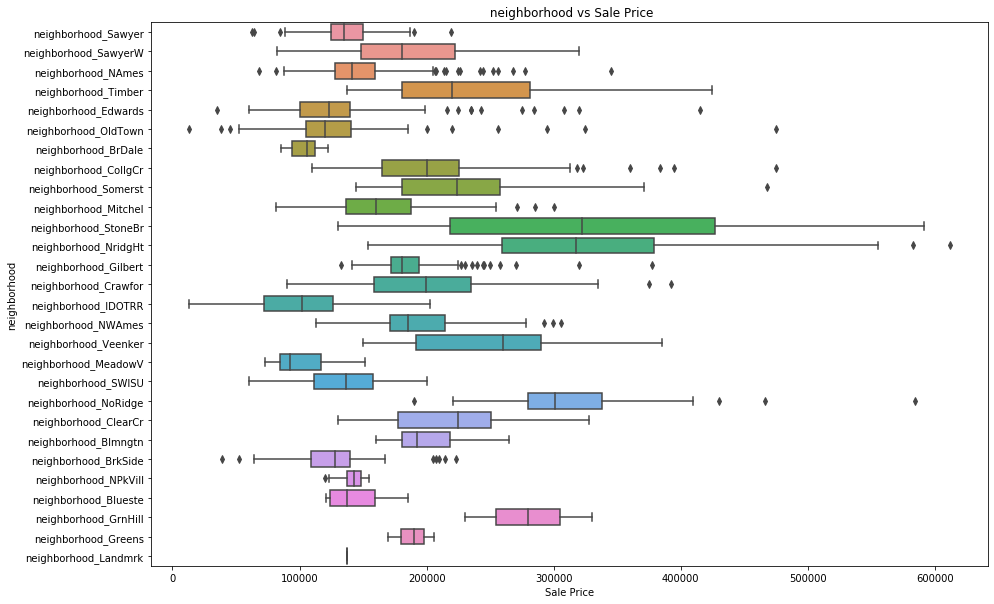

In [34]:
subplots(df, columns=['neighborhood'], h_box = True, figsize=(15,10))

The boxplot above shows the mean of the saleprice by neighborhood. From the plot we can see that there are certain neighborhoods that are associated with higher prices, such as Northridge Heights and Stone Brook. This indicates that the neighborhood feature may be predictive of the sale price, and we should keep this feature.

### Investigating continuous features

C:\Users\User\Anaconda3\envs\dsi\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\envs\dsi\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


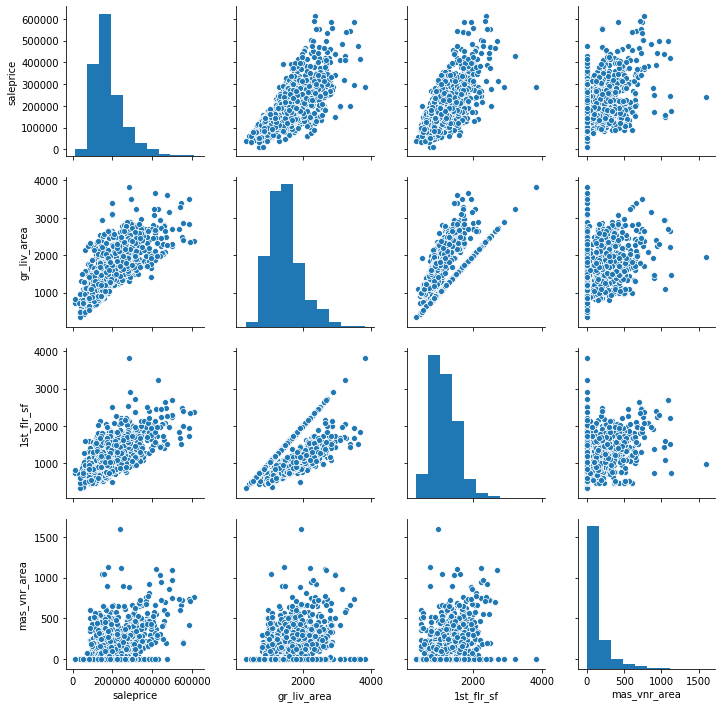

In [35]:
subplots(df, columns=['saleprice','gr_liv_area','1st_flr_sf','mas_vnr_area'],plot_func=sns.pairplot)

### Investigation Notes:
We could see from the plots above that some of these features does have some effect on the saleprice, as we can see some relationship between the features such as above ground living area, 1st floor squarefeet and the saleprice.

However, as there are many categorical columns in this dataset, we will need a better way to automatically select and filter out which features are the best predictors of the sale price that we would like to predict, as it not feasible for us to manually inspect each of these categorical columns one by one.

Investigating these few features gave us some insight about how these features have an impact on the sale price in general.

### Investigating correlations between input features

In [36]:
# Helper method to generate heatmap
def get_corr(dataframe,figsize=(16,12), plotargs=None, title='Heatmap', **kwargs ):
    '''
    get_corr expecets a dataframe input that may or may not include the the saleprice column. The dataframe rows
    should not be shuffled compared to the source dataframe 
    '''
    corr_df=dataframe.copy()
    # Remove nominal columns from the dataframe
#     corr_df = corr_df[ [col for col in corr_df.columns if col not in list(pd.get_dummies(df_s1.astype(str), drop_first=True).columns) ] ]
    
    if 'saleprice' not in corr_df.columns:
        corr_df = pd.concat([df['saleprice'], corr_df],axis=1 )
    
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    mask = np.zeros_like(corr_df.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    fig,ax = plt.subplots(figsize=figsize);
    ax = sns.heatmap(corr_df.corr(), ax=ax, cmap=cmap, mask=mask, **kwargs );
    ax.set_title(title)
    return ax

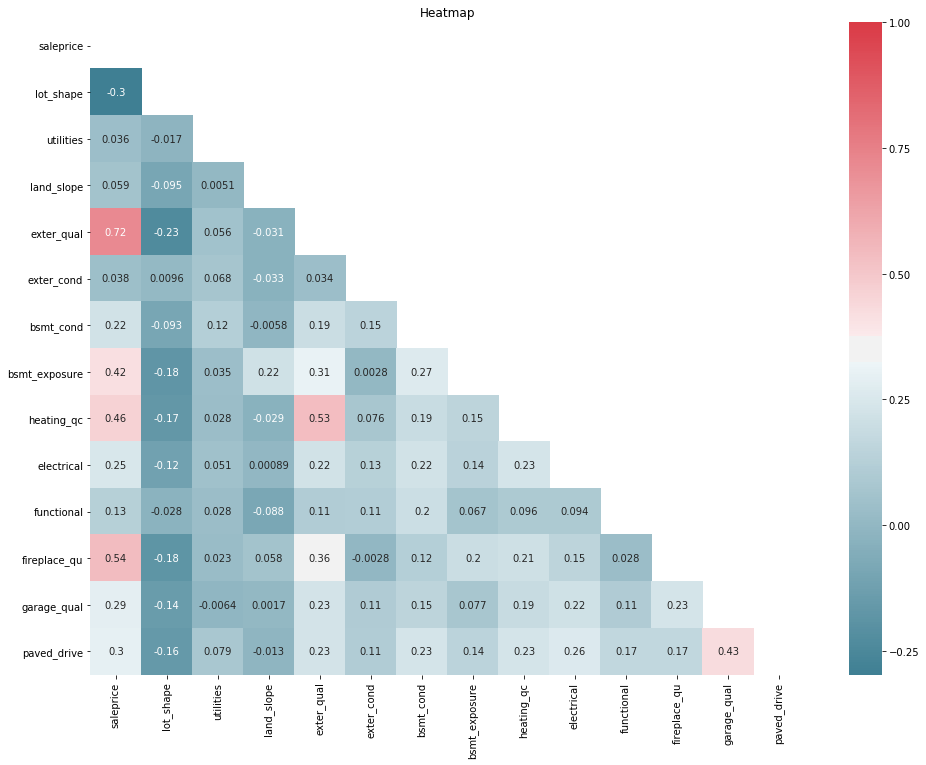

In [37]:
get_corr(X_train[[ col for col in categorical_to_ordinal_cols if col in X_train.columns ] ], annot=True)

As we can see there are not much correlations between the ordinal features that were converted from categorical. We will still run a Lasso model to identify and eliminate any multicolinearity among the features. 

### Scale the training and test dataset

In [38]:
# first normalize X_train and X_test
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)

# Transform the test set with data obtained form train set
X_test_sc = ss.transform(X_test)

### Scoring Functions

In [39]:
def r2_adj(y_true, y_preds, p):
    n = len(y_true)
    y_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
    denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
    return 1 - numerator / denominator

import sklearn.metrics as metrics
import numpy as np


def get_metrics(y_true, y_pred, p):
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
#     msle = metrics.mean_squared_log_error(y_true, y_pred)
    mae = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    r2a = r2_adj(y_true, y_pred, p)
    
    print('Mean squared error      = ', mse)
    print('Root mean squared error = ', rmse)
#     print('Mean squared log error  = ', msle)
    print('Median absolute error   = ', mae)
    print('R^2                     = ', r2)
    print('Adjusted R^2            = ', r2a)
    

In [40]:
def score_model(model, columns):
    
    # first normalize X_train and X_test
    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train[columns])

    # Transform the test set with data obtained form train set
    X_test_sc = ss.transform(X_test[columns])
    
    model.fit(X_train_sc,y_train)
    
    
    
    print("Train Set Metrics")
#     print("Cross Val R2 Score:",model.score(X_train_sc,y_train))
    get_metrics(y_train, model.predict(X_train_sc), X_train_sc.shape[1])

    print("\nTest Set Metrics")
#     print("Cross Val R2 Score:",model.score(X_test_sc, y_test))
    get_metrics(y_test, model.predict(X_test_sc), X_test_sc.shape[1])
    return {'model':model, 'scaler':ss}

# Modelling

### Baseline Model

In [41]:
# Create a baseline model using mean of target as the prediction

from sklearn.dummy import DummyRegressor

# Dummy constant
dummy_constant = DummyRegressor(strategy = 'constant', constant = y_train.mean())
baseline_model = score_model(dummy_constant, X_train.columns)

Train Set Metrics
Mean squared error      =  6344376316.492906
Root mean squared error =  79651.59330793645
Median absolute error   =  46915.35629067244
R^2                     =  0.0
Adjusted R^2            =  -0.11091018685955412

Test Set Metrics
Mean squared error      =  5750538100.918753
Root mean squared error =  75832.3024898938
Median absolute error   =  42415.35629067244
R^2                     =  -0.00331858621042036
Adjusted R^2            =  -9.233849579346288


The baseline model has an adjusted R2 score of -9.23 on the test set

### Creating the First model (Linear Regression model)

In [42]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score


In [43]:
lr = LinearRegression()

lr_model = score_model(lr, X_train.columns)

Train Set Metrics
Mean squared error      =  536649067.3773748
Root mean squared error =  23165.687284804975
Median absolute error   =  12177.509463647672
R^2                     =  0.9154134243294654
Adjusted R^2            =  0.9060319114160366

Test Set Metrics
Mean squared error      =  2.2726051871348036e+30
Root mean squared error =  1507516231134777.5
Median absolute error   =  14051.866123608808
R^2                     =  -3.965102018898482e+20
Adjusted R^2            =  -4.0444040592764515e+21


### Notes on Linear Regression Model
The simple linear regression model with all features achieved an adjusted R2 score of 0.90 for training set but -4.044e+21 for the test set. This shows that the model is overfitting with a high variance

### Instantiate the Second model (Linear Regression with Lasso Regularization)

In [44]:
# Use lasso CV

lasso_cv = LassoCV(cv=10, n_jobs=-1, n_alphas=200)


In [45]:
lasso = score_model(lasso_cv, X_train.columns)

Train Set Metrics
Mean squared error      =  575772989.1152934
Root mean squared error =  23995.270140494216
Median absolute error   =  12414.782729597362
R^2                     =  0.9092467154543611
Adjusted R^2            =  0.8991812517072859

Test Set Metrics
Mean squared error      =  609127640.062933
Root mean squared error =  24680.51134119658
Median absolute error   =  13478.602814175596
R^2                     =  0.8937231486994253
Adjusted R^2            =  -0.08402388326586241


### Note on second model (Lasso):
The Lasso model have a similar score compared to the first linear regression model for the training set, however it performed significantly better on the test set with an r2 of 0.899 and adjusted r2 of -0.084 compared to the LR model.

Now we'll investigate the coefficients for each features assigned by Lasso to interprete which are features with the best predictive power with respect to sale price

In [46]:
lasso_coef_pd = pd.DataFrame(data=lasso_cv.coef_,index=final.columns, columns=['coef'])
lasso_coef_pd['abs_coef'] = lasso_coef_pd['coef'].map(np.abs)
# View the top important features selected by Lasso
lasso_coef_pd.sort_values(by=['abs_coef'], ascending=False, inplace=True)
lasso_coef_pd.head(10)

,coef,abs_coef
gr_liv_area,24699.492586,24699.492586
exter_qual,12297.934119,12297.934119
neighborhood_NridgHt,10037.663303,10037.663303
1st_flr_sf,9839.345024,9839.345024
bsmt_exposure,6990.980313,6990.980313
neighborhood_StoneBr,6965.550655,6965.550655
garage_area,6471.896101,6471.896101
mas_vnr_area,6408.936837,6408.936837
bsmt_full_bath,5550.661718,5550.661718
sale_type_New,5372.018367,5372.018367


In [47]:
ls_dropped_features = lasso_coef_pd[lasso_coef_pd['abs_coef'] == 0]
print("Lasso has set the coefficients of {} features to 0.\nThe dropped features includes:{}"
      .format((len(ls_dropped_features)),", ".join([f for f in ls_dropped_features[:8].index])))

Lasso has set the coefficients of 76 features to 0.
The dropped features includes:bsmt_half_bath, central_air_Y, heating_Wall, garage_type_Attchd, 3ssn_porch, sale_type_WD , garage_type_Detchd, low_qual_fin_sf


Text(0.5, 1.0, 'Coefficients for the top 25 features selected by Lasso')

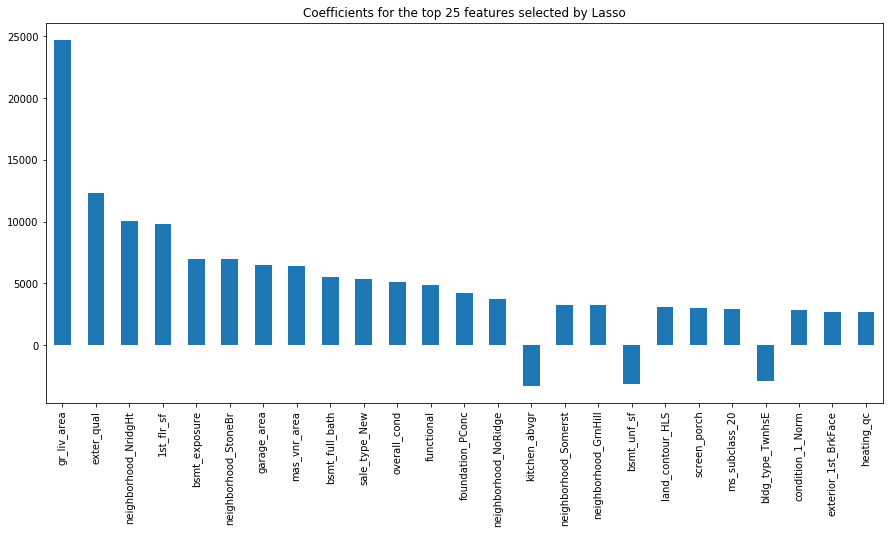

In [48]:
# Features with the highest predictive power selected by lasso
pd.Series(lasso_coef_pd.coef[:25], index=lasso_coef_pd.index[:25]).plot.bar(figsize=(15, 7));
plt.title("Coefficients for the top 25 features selected by Lasso")

We will drop the features that Lasso have set the coefficients to 0 and re-run the model again.

### Third Model : Lasso CV on reduced features

In [49]:
features_3 = [ col for col in X_train.columns if col not in ls_dropped_features.index ]

In [50]:
# Re-run lasso cv
lasso_cv = LassoCV(cv=10, n_jobs=-1, n_alphas=200)
score_model(lasso_cv, features_3)

Train Set Metrics
Mean squared error      =  557428036.0190638
Root mean squared error =  23609.91393502026
Median absolute error   =  12241.985444706486
R^2                     =  0.9121382452409122
Adjusted R^2            =  0.9066690409100873

Test Set Metrics
Mean squared error      =  600839409.9648409
Root mean squared error =  24512.02582335538
Median absolute error   =  13456.18827304407
R^2                     =  0.8951692282068153
Adjusted R^2            =  0.7772346099394826


{'model': LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
         max_iter=1000, n_alphas=200, n_jobs=-1, normalize=False, positive=False,
         precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
         verbose=False),
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

#### Note on third model:
The R2 and adjusted R2 score for the training set still remains the same (0.91 and 0.90 ), however the adjusted r2 score for the test set have improved significantly to 0.77 from -0.084.
This shows that despite having only 108 columns, the adjusted R2 score actually improved on the test set. When two models have similar performance, it is favourable to choose the model with less features as it is less complex and easier to interprete. Performance wise it is also more efficient.


In [51]:
lasso_coef_pd = pd.DataFrame(data=lasso_cv.coef_,index=features_3, columns=['coef'])
lasso_coef_pd['abs_coef'] = lasso_coef_pd['coef'].map(np.abs)
lasso_coef_pd.sort_values(by=['abs_coef'], ascending=False, inplace=True)
ls_dropped_features_2 = lasso_coef_pd[lasso_coef_pd['abs_coef'] == 0]
ls_dropped_features_2

,coef,abs_coef


On the second iteration, no features was dropped (coefficients set to 0) by Lasso.

Text(0.5, 1.0, 'Coefficients for the top 10 features')

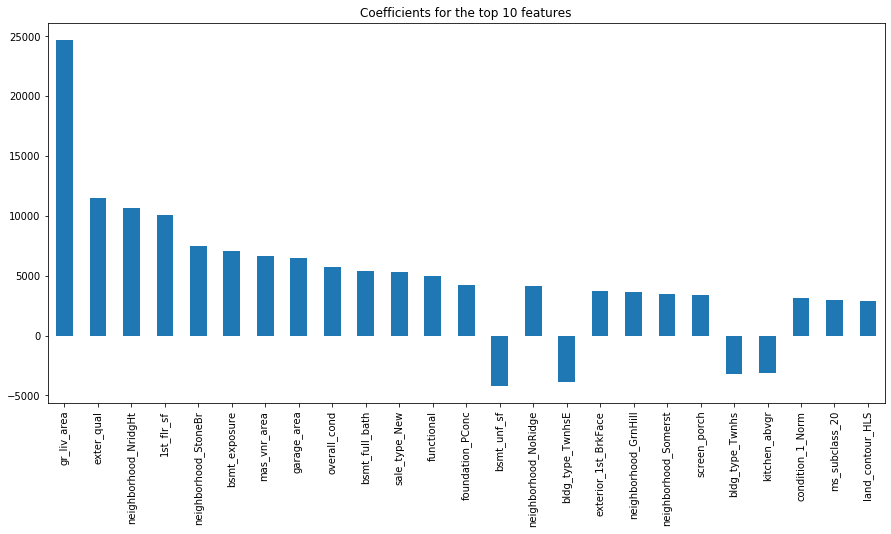

In [52]:
# Features with the highest predictive power selected by lasso
pd.Series(lasso_coef_pd.coef[:25], index=lasso_coef_pd.index[:25]).plot.bar(figsize=(15, 7));
plt.title("Coefficients for the top 10 features")

The top features remains the same compared to the first iteration.

### Final Model : Running Ridge Regression on the top 25 features selected by lasso CV

In [53]:
features_4 = [ col for col in lasso_coef_pd.index[:25] if col not in ls_dropped_features_2.index ]

In [54]:
ridge_alphas = np.logspace(0, 5, 200)
ridge = RidgeCV(alphas=ridge_alphas, cv=10)
# optimal_ridge = Ridge(alpha = ridge.alpha_)
ridge_cv = score_model(ridge, features_4)

Train Set Metrics
Mean squared error      =  708685962.7512695
Root mean squared error =  26621.15630004207
Median absolute error   =  14514.820038799939
R^2                     =  0.8882969850150657
Adjusted R^2            =  0.8867609149520166

Test Set Metrics
Mean squared error      =  712894984.5272217
Root mean squared error =  26700.093343043234
Median absolute error   =  15596.771111068956
R^2                     =  0.8756184594485035
Adjusted R^2            =  0.8582467359077917


In [55]:
ridge_model = ridge_cv.get('model')

In [56]:
final_model = score_model(Ridge(alpha= ridge_model.alpha_), features_4)

Train Set Metrics
Mean squared error      =  708685962.7512695
Root mean squared error =  26621.15630004207
Median absolute error   =  14514.820038799939
R^2                     =  0.8882969850150657
Adjusted R^2            =  0.8867609149520166

Test Set Metrics
Mean squared error      =  712894984.5272217
Root mean squared error =  26700.093343043234
Median absolute error   =  15596.771111068956
R^2                     =  0.8756184594485035
Adjusted R^2            =  0.8582467359077917


#### Final Ridge model evaluation.
The R2 and adjusted R2 score for the train set have reduced slightly to 0.88, however the adjusted R2 score for the test set have increased to 0.858. This is a good indicator that the model is performing well taking into account that there are only 25 number of features.

In [57]:
ridge_coef_pd = pd.DataFrame({'feature':features_4,'coef': ridge_model.coef_})
ridge_coef_pd['abs_coef'] = ridge_coef_pd['coef'].map(np.abs)
ridge_coef_pd.sort_values(by='abs_coef',ascending=False, inplace=True)
ridge_coef_pd[:5]

,feature,coef,abs_coef
0,gr_liv_area,31320.595432,31320.595432
1,exter_qual,15089.986447,15089.986447
2,neighborhood_NridgHt,10766.467533,10766.467533
3,1st_flr_sf,10255.683775,10255.683775
5,bsmt_exposure,8040.478407,8040.478407


Text(0.5, 1.0, 'Coefficients for the top 25 features')

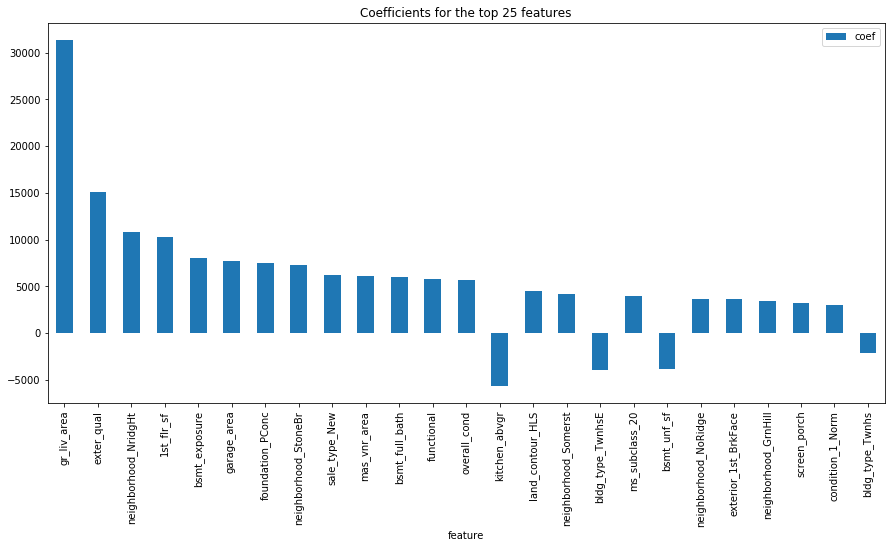

In [58]:
ridge_coef_pd[['feature','coef']].plot.bar(figsize=(15,7),x='feature', y='coef');
plt.title("Coefficients for the top 25 features")

The chart above illustrates the effect of a feature towards the sale price. For example, a unit increase in Above Grade Living area (gr_liv_area) will result in an increase of 31320 on the sale price

## Generate predictions on final test set


In [59]:
# Load the test set
test_pd_raw = pd.read_csv('data/test.csv')


### Transform the final test set according to the same steps performed on training set

In [60]:
# Rename and lowercase column names 
fix_columns(test_pd_raw)
# Drop columns that have mostly missing data (from test set)
test_pd = drop_init_cols(test_pd_raw)
test_comb = get_final_df( test_pd) 

Warning null values detected in combined dataframe


In [61]:
# Impute null columns in the test set with median values from training set
test_comb = test_comb.fillna(X_train.median())

In [62]:
# Generate test set with the same columns as the X_train 
def fix_test_x(test_comb_df, final_train_df, scaler):
    missing_cols = set(final_train_df.columns) - set(test_comb_df.columns)
    test_X_final = test_comb_df.copy()
    for c in missing_cols:
        test_X_final[c] = 0
    test_X_final = test_X_final[final_train_df.columns]
    
    # Use the existing scaler to normalize  X_test

    test_X_final_sc = scaler.transform(test_X_final)
    return test_X_final_sc

In [63]:
# Generate predictions using the final model 
def generate_predictions(model, x, pd_with_id, preds_file ):
    preds = model.predict(x)
    preds_df = pd.DataFrame({'Id':pd_with_id['id'],'SalePrice':preds })
    preds_df.to_csv(preds_file,index=False)

In [64]:
# Generate test X , using subset of columns and the scaler that was used to scale
# X_train
test_X_sc = fix_test_x(test_comb, X_train[features_4], ridge_cv.get('scaler') )
print("test_X_sc shape:{}".format(test_X_sc.shape))
generate_predictions(final_model.get('model'),test_X_sc, test_pd_raw, 'predictions/ridge_preds_2.csv')

test_X_sc shape:(879, 25)


### Kaggle Submission Result

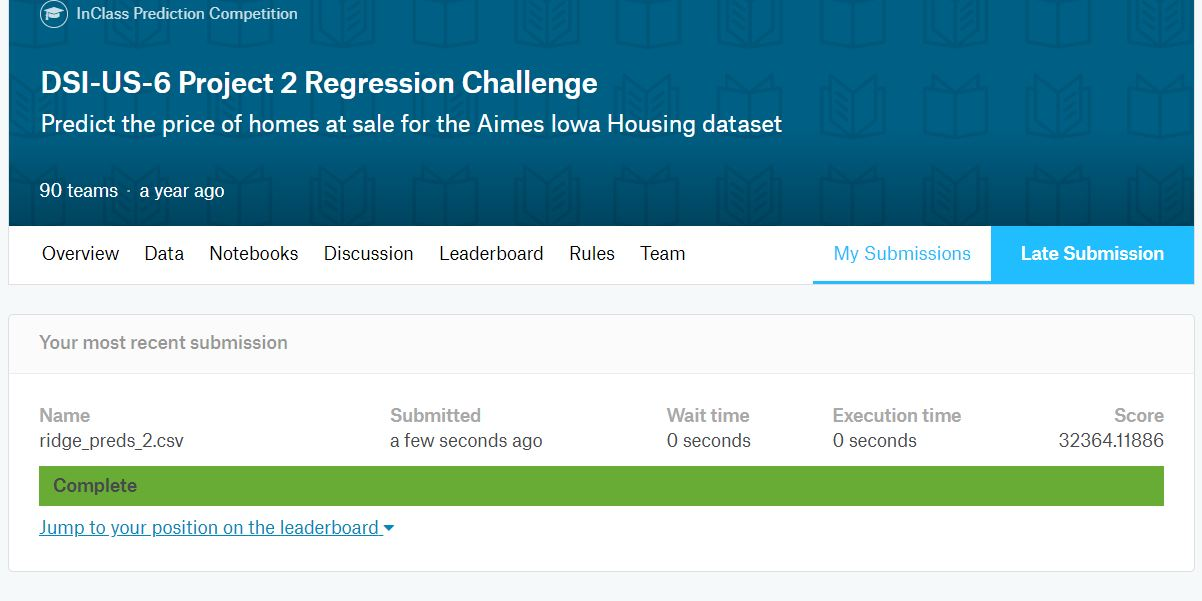

In [65]:
from IPython.display import Image
Image(filename = 'predictions/kaggle3.jpg')

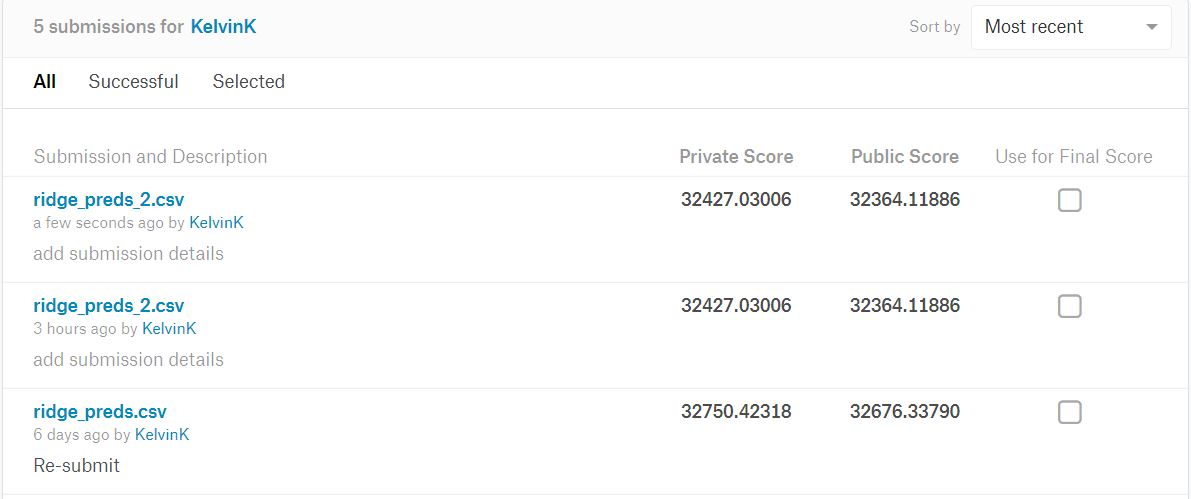

In [66]:
Image(filename = 'predictions/kaggle4.jpg')

Using the Ridge model, the final submission had a Mean Squared Error of 32427 on the private scoreboard and 32364 on the public scoreboard 

## Conclusion & Recommendations
We choose the ridge model as our final model to perform predictions on the test set as it has the best performance in overall. Out of the 184 initial features originally (after converting nominal data to dummies) , we managed to scale down to only 25 features with the highest predictive power on the target variable (sale price).
Compared to the baseline model with an adjusted R2 score of -9.23 on the test set, the Ridge model managed to score 0.858 which is a significant improvement.


We also identified that the top features 5 that have the most predictive power on the sale price are:
1. Above ground living area square feet (gr_liv_area)
2. Quality of the material on the exterior (exter_qual)
3. Northridge Heights Neighbourhood (neighborhood_NridgHt)
4. 1st Floor Sqft (1st_flr_sf)
5. Walkout or garden level walls (bsmt_exposure)


There are some features that hurts the value of a home. Those are:
1. Unfinished square feet of basement area (bsmt_unf_sf)
2. Townhouse End Unit (bldg_type_TwnhsE)
3. Kitchens above grade

Recommendations to homeowners to improve value of a home:
1. Increase the above ground living area square feet
2. Maintain good quality of material on the exterior
3. Increase the first floor squarefeet

Which are good neighbourhoods for investment?
1. Northridge Heights
2. Stone Brook
3. Somerset

This model will most likely not be able to perform well on other cities as the housing trends from other cities may be very different compared to the trends in Iowa, while this model is only being trained on data obtained from Iowa.One way to generalize the model is to obtain housing data from other cities and include them into the training set. 